In [5]:
# Are Aircraft Flight Serial Number random or not? Let's find out
# The code is actually alpha-numeric. The letters, obviously, are correlated with geography. But the numerical component 
# appear to be random at first sight. Nevertheless, We succeed to generate 3 distinct cluster of data, using 1 & 2 - Gram
# and Natural Language Processing.

# Jerome Blanchet - Transport Canada Analysis

from __future__ import print_function
from __future__ import division
import os
import re
import os
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import DataFrame
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from mpl_toolkits.axes_grid.anchored_artists import AnchoredDrawingArea
#import utils
#import skutils
#import clone
from IPython.display import Image

#matplotlib.style.use('ggplot')

In [6]:
import numpy
print('numpy: {}'.format(numpy.__version__))
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
import pandas
print('pandas: {}'.format(pandas.__version__))

numpy: 1.18.1
matplotlib: 3.1.3
pandas: 1.0.1


In [7]:
df3 = pd.read_csv(r'C:\Users\18195\Downloads\CADORS_Aircraft_Information.csv')
df4 = pd.read_csv(r'C:\Users\18195\Downloads\CADORS_Occurrence_Information.csv')

In [9]:
print(df3.columns)
print(df4.columns)

Index(['CADORSNUMBER', 'AIRCRAFTNUMBER', 'aircraftregistration',
       'foreignaircraftregistration', 'FLIGHTNUMBER', 'FLIGHT_RULE_ENM',
       'FLIGHT_RULE_FNM', 'CATEGORYDESCRIPTIONE', 'CATEGORYDESCRIPTIONF',
       'COUNTRY_ENM', 'COUNTRY_FNM', 'AIRCRAFT_MAKE_NAME_NM',
       'AIRCRAFT_MODEL_NAME_NM', 'AIRCRAFTYEARBUILT', 'HOMEBUILTAIRCRAFT',
       'ENGINE_MANUFACTURER_NAME_NM', 'ENGINE_MODEL_NAME_NM',
       'ENGINETYPEDESCRIPTIONE', 'ENGINETYPEDESCRIPTIONF',
       'GEARTYPEDESCRIPTIONE', 'GEARTYPEDESCRIPTIONF', 'PHASENAMEE',
       'PHASENAMEF', 'DAMAGEDESCRIPTIONE', 'DAMAGEDESCRIPTIONF', 'operator',
       'OPERATORTYPEDESCRIPTIONE', 'OPERATORTYPEDESCRIPTIONF',
       'OPERATION_SECTOR_ELBL', 'OPERATION_SECTOR_FLBL', 'owner'],
      dtype='object')
Index(['CADORSNUMBER', 'OCCURRENCETYPEDESCRIPTIONE',
       'OCCURRENCETYPEDESCRIPTIONF', 'OCCURENCEDATE', 'OCCURRENCETIME',
       'DAYORNIGHT', 'FATALITIES', 'INJURIES', 'AERODROMEID',
       'AERODROMELOCATION', 'OCCURRENCELOCATI

In [12]:
#df = df3.sort_values('MARK',ascending=False)
df3.head(20)

,CADORSNUMBER,AIRCRAFTNUMBER,aircraftregistration,foreignaircraftregistration,FLIGHTNUMBER,FLIGHT_RULE_ENM,FLIGHT_RULE_FNM,CATEGORYDESCRIPTIONE,CATEGORYDESCRIPTIONF,COUNTRY_ENM,...,PHASENAMEE,PHASENAMEF,DAMAGEDESCRIPTIONE,DAMAGEDESCRIPTIONF,operator,OPERATORTYPEDESCRIPTIONE,OPERATORTYPEDESCRIPTIONF,OPERATION_SECTOR_ELBL,OPERATION_SECTOR_FLBL,owner
0,2010O3070,525499,NaN,NaN,ACA180,NaN,NaN,Aeroplane,Avion,Canada,...,Approach,Approche,No Damage,Aucun,AIR CANADA (5262),Commercial,Commercial,NaN,NaN,AIR CANADA
1,2010A1128,524498,NaN,NaN,JZA790,NaN,NaN,Aeroplane,Avion,Canada,...,Landing,Atterrissage,No Damage,Aucun,"JAZZ AIR LP, AS REPRESENTED BY ITS GENERAL PA...",Commercial,Commercial,NaN,NaN,JAZZ AIR LP - AIR CANADA JAZZ
2,2010Q2410,524651,GPVN,NaN,NaN,NaN,NaN,Aeroplane,Avion,Canada,...,Takeoff,Décollage,No Damage,Aucun,BRUCELANDAIR INTERNATIONAL (5079),Commercial,Commercial,NaN,NaN,138883 CANADA INC - BRUCELANDAIR INTERNATIONAL
3,2010A1156,524945,NaN,NaN,FLE1525,NaN,NaN,Aeroplane,Avion,Canada,...,Cruise,Croisière,No Damage,Aucun,FLAIR AIRLINES LTD. (14941),Commercial,Commercial,NaN,NaN,FLAIR AIRLINES LTD
4,2010Q2444,525015,NaN,NaN,NaN,NaN,NaN,Aeroplane,Avion,Canada,...,Cruise,Croisière,No Damage,Aucun,NaN,Private,Privée,NaN,NaN,NaN
5,2010P1747,525123,NaN,NaN,NaN,NaN,NaN,Aeroplane,Avion,Canada,...,Descent,Descente,No Damage,Aucun,NaN,Private,Privée,NaN,NaN,CHARTRIGHT AIR INC.
6,2010P1755,525250,GLYS,NaN,NaN,NaN,NaN,Aeroplane,Avion,Canada,...,Takeoff,Décollage,No Damage,Aucun,LONDON AIR SERVICES LIMITED (11665),Commercial,Commercial,NaN,NaN,LONDON AIR SERVICES LIMITED
7,2010O3188,526335,GLQN,NaN,POE116,NaN,NaN,Aeroplane,Avion,Canada,...,Approach,Approche,Unknown,Inconnu,PORTER AIRLINES INC. (15266),Commercial,Commercial,NaN,NaN,PORTER AIRLINES INC.
8,2011O0261,529808,GGBN,NaN,NaN,NaN,NaN,Aeroplane,Avion,Canada,...,Takeoff,Décollage,Unknown,Inconnu,WATERLOO-WELLINGTON FLYING CLUB (734),Commercial,Commercial,NaN,NaN,WATERLOO-WELLINGTON FLYING CLUB
9,2011O0263,529825,GLQF,NaN,POE390,NaN,NaN,Aeroplane,Avion,Canada,...,Approach,Approche,No Damage,Aucun,PORTER AIRLINES INC. (15266),Commercial,Commercial,NaN,NaN,PORTER AIRLINES INC.


In [13]:
#df = df.sort_values('MARK',ascending=False)
df4.head(20)

,CADORSNUMBER,OCCURRENCETYPEDESCRIPTIONE,OCCURRENCETYPEDESCRIPTIONF,OCCURENCEDATE,OCCURRENCETIME,DAYORNIGHT,FATALITIES,INJURIES,AERODROMEID,AERODROMELOCATION,...,TC_REGION_ENM,TC_REGION_FNM,COUNTRY_ENM,COUNTRY_FNM,WORLDAREANAMEE,WORLDAREANAMEF,AORNUMBER,OCCURRENCE_CLASS_TYPE_ELBL,OCCURRENCE_CLASS_TYPE_FLBL,TSBOCCURRENCENUMBER
0,2004C2314,Incident,Incident,2004-11-15,1915 Z,Day,0,0,CYFB,IQALUIT NU (CYFB),...,Prairie and Northern Region,Région des Praries et du Nord,Canada,Canada,North America,Amérique du Nord,51312-V2,NaN,NaN,NaN
1,2005Q0247,Incident,Incident,2005-02-18,0602 Z,NaN,0,0,CYGW,KUUJJUARAPIK QC (CYGW),...,Quebec Region,Région du Québec,Canada,Canada,North America,Amérique du Nord,53698-V1,NaN,NaN,NaN
2,2005Q0248,Incident,Incident,2005-02-18,1302 Z,Day,0,0,CYQB,QUÉBEC / JEAN LESAGE INTL QC (CYQB),...,Quebec Region,Région du Québec,Canada,Canada,North America,Amérique du Nord,53706-V1,NaN,NaN,NaN
3,2005Q0249,Incident,Incident,2005-02-18,1507 Z,Day,0,0,CYVP,KUUJJUAQ QC (CYVP),...,Quebec Region,Région du Québec,Canada,Canada,North America,Amérique du Nord,53732-V1,NaN,NaN,NaN
4,2005Q0250,Incident,Incident,2005-02-18,1859 Z,Day,0,0,NaN,NaN,...,Quebec Region,Région du Québec,Canada,Canada,North America,Amérique du Nord,53713-V1,NaN,NaN,NaN
5,2005Q0251,Incident,Incident,2005-02-18,1944 Z,Day,0,0,CYBX,LOURDES-DE-BLANC-SABLON QC (CYBX),...,Quebec Region,Région du Québec,Canada,Canada,North America,Amérique du Nord,53717-V1,NaN,NaN,NaN
6,2005C0399,Incident,Incident,2005-02-21,2200 Z,Day,0,0,CYOC,OLD CROW YT (CYOC),...,Prairie and Northern Region,Région des Praries et du Nord,Canada,Canada,North America,Amérique du Nord,53795-V1,NaN,NaN,NaN
7,2005C0400,Incident,Incident,2005-02-20,2215 Z,Day,0,0,CYBW,CALGARY / SPRINGBANK AB (CYBW),...,Prairie and Northern Region,Région des Praries et du Nord,Canada,Canada,North America,Amérique du Nord,53796-V1,NaN,NaN,NaN
8,2005C0402,Incident,Incident,2005-02-22,1627 Z,Day,0,0,CYYC,CALGARY INTL AB (CYYC),...,Prairie and Northern Region,Région des Praries et du Nord,Canada,Canada,North America,Amérique du Nord,53803-V1,NaN,NaN,NaN
9,2005Q0253,Incident,Incident,2005-02-19,1843 Z,Day,0,0,CYGL,LA GRANDE RIVIÈRE QC (CYGL),...,Quebec Region,Région du Québec,Canada,Canada,North America,Amérique du Nord,53746-V1,NaN,NaN,NaN


In [14]:
print(df3.shape)
print(df4.shape)

(569938, 15)
(1000, 8)
(236881, 31)
(277204, 23)


In [15]:
pip install quilt

Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [17]:
import missingno as msno

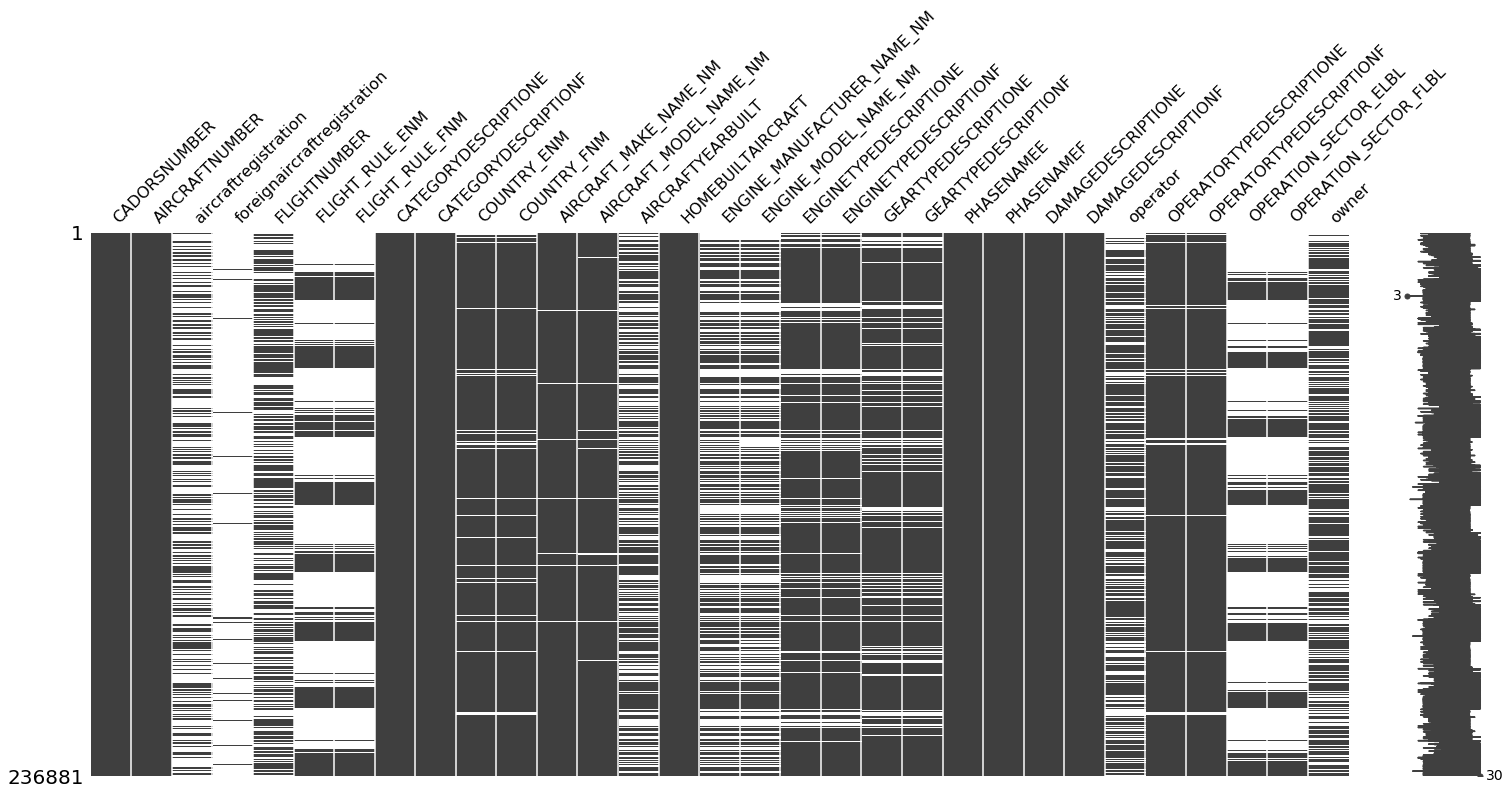

In [20]:
msno.matrix(df3)

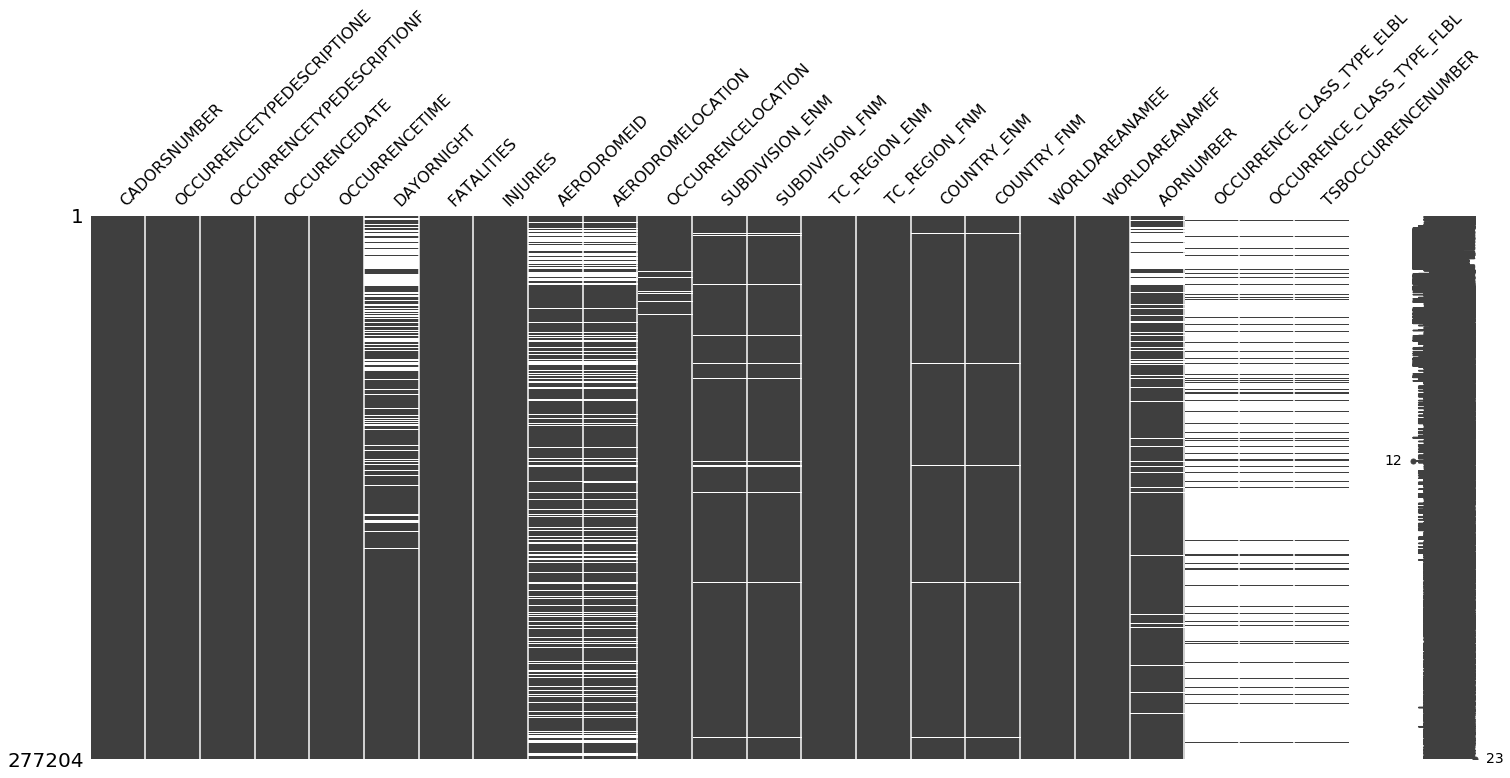

In [21]:
msno.matrix(df4)

In [29]:
from collections import Counter
import string

In [33]:
df33 = df3.drop(['AIRCRAFTNUMBER', 'aircraftregistration', 
       'foreignaircraftregistration', 'FLIGHT_RULE_ENM',
       'FLIGHT_RULE_FNM', 'CATEGORYDESCRIPTIONE', 'CATEGORYDESCRIPTIONF',
       'COUNTRY_ENM', 'COUNTRY_FNM', 'AIRCRAFT_MAKE_NAME_NM',
       'AIRCRAFT_MODEL_NAME_NM', 'AIRCRAFTYEARBUILT', 'HOMEBUILTAIRCRAFT',
       'ENGINE_MANUFACTURER_NAME_NM', 'ENGINE_MODEL_NAME_NM',
       'ENGINETYPEDESCRIPTIONE', 'ENGINETYPEDESCRIPTIONF',
       'GEARTYPEDESCRIPTIONE', 'GEARTYPEDESCRIPTIONF', 'PHASENAMEE',
       'PHASENAMEF', 'DAMAGEDESCRIPTIONE', 'DAMAGEDESCRIPTIONF', 'operator',
       'OPERATORTYPEDESCRIPTIONE', 'OPERATORTYPEDESCRIPTIONF',
       'OPERATION_SECTOR_ELBL', 'OPERATION_SECTOR_FLBL', 'owner'], axis=1)
df44 = df4.drop(['OCCURRENCETYPEDESCRIPTIONF', 'OCCURENCEDATE', 'OCCURRENCETIME',
       'DAYORNIGHT', 'FATALITIES', 'INJURIES', 'AERODROMEID',
       'AERODROMELOCATION', 'OCCURRENCELOCATION', 'SUBDIVISION_ENM',
       'SUBDIVISION_FNM', 'TC_REGION_ENM', 'TC_REGION_FNM', 'COUNTRY_ENM',
       'COUNTRY_FNM', 'WORLDAREANAMEE', 'WORLDAREANAMEF', 'AORNUMBER',
       'OCCURRENCE_CLASS_TYPE_ELBL', 'OCCURRENCE_CLASS_TYPE_FLBL',
       'TSBOCCURRENCENUMBER'], axis=1)

In [34]:
data = pd.merge(df33, df44, on='CADORSNUMBER', how='left')
data = data.drop(['CADORSNUMBER'], axis=1)
data

,FLIGHTNUMBER,OCCURRENCETYPEDESCRIPTIONE
0,ACA180,Incident
1,JZA790,Incident
2,NaN,Incident
3,FLE1525,Incident
4,NaN,Incident
...,...,...
236876,NaN,Incident
236877,ACA025,Incident
236878,NaN,Incident
236879,CJT621,Incident


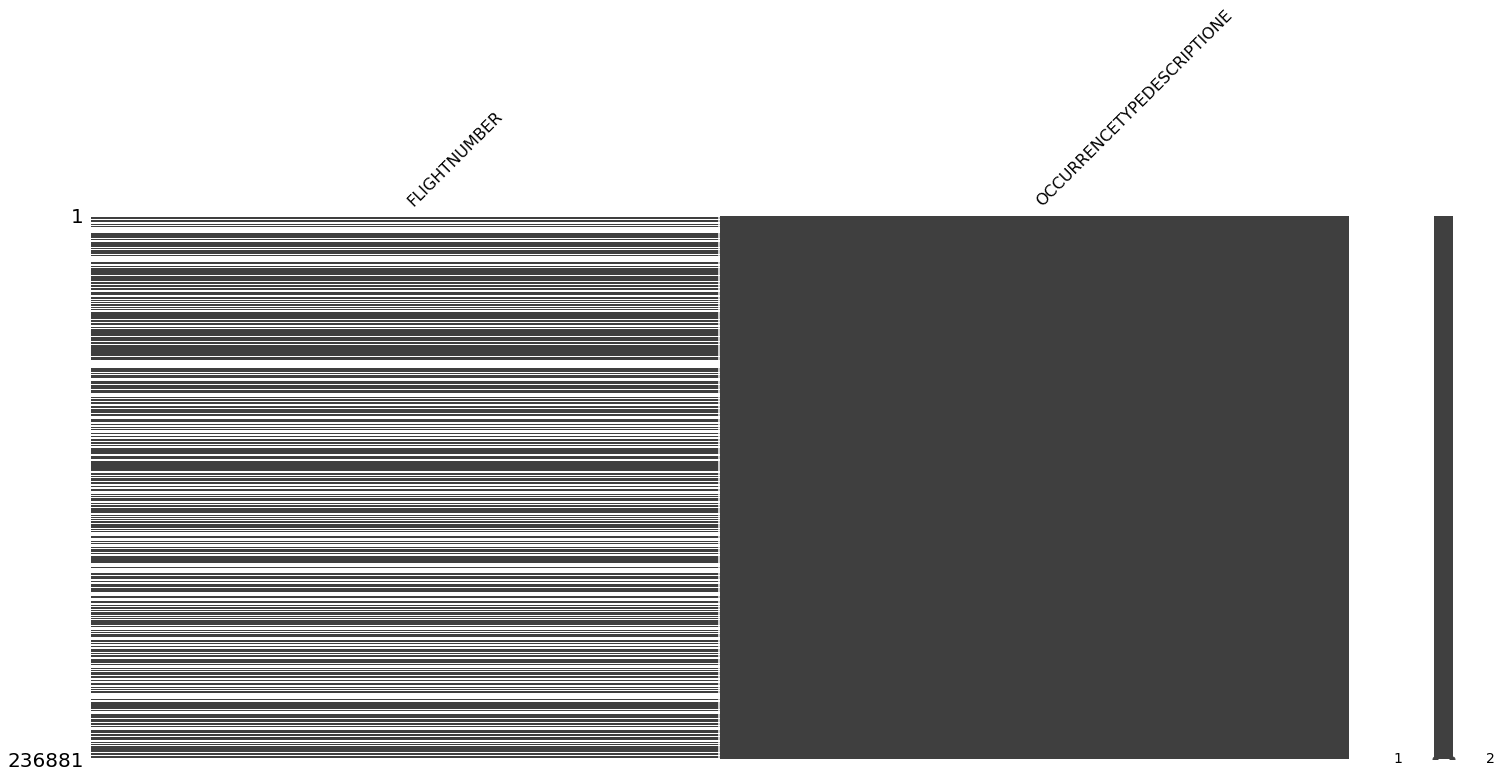

In [35]:
msno.matrix(data)

In [36]:
data.describe(include = 'all').T

,count,unique,top,freq
FLIGHTNUMBER,139462,44119,TW,127
OCCURRENCETYPEDESCRIPTIONE,236881,2,Incident,227962


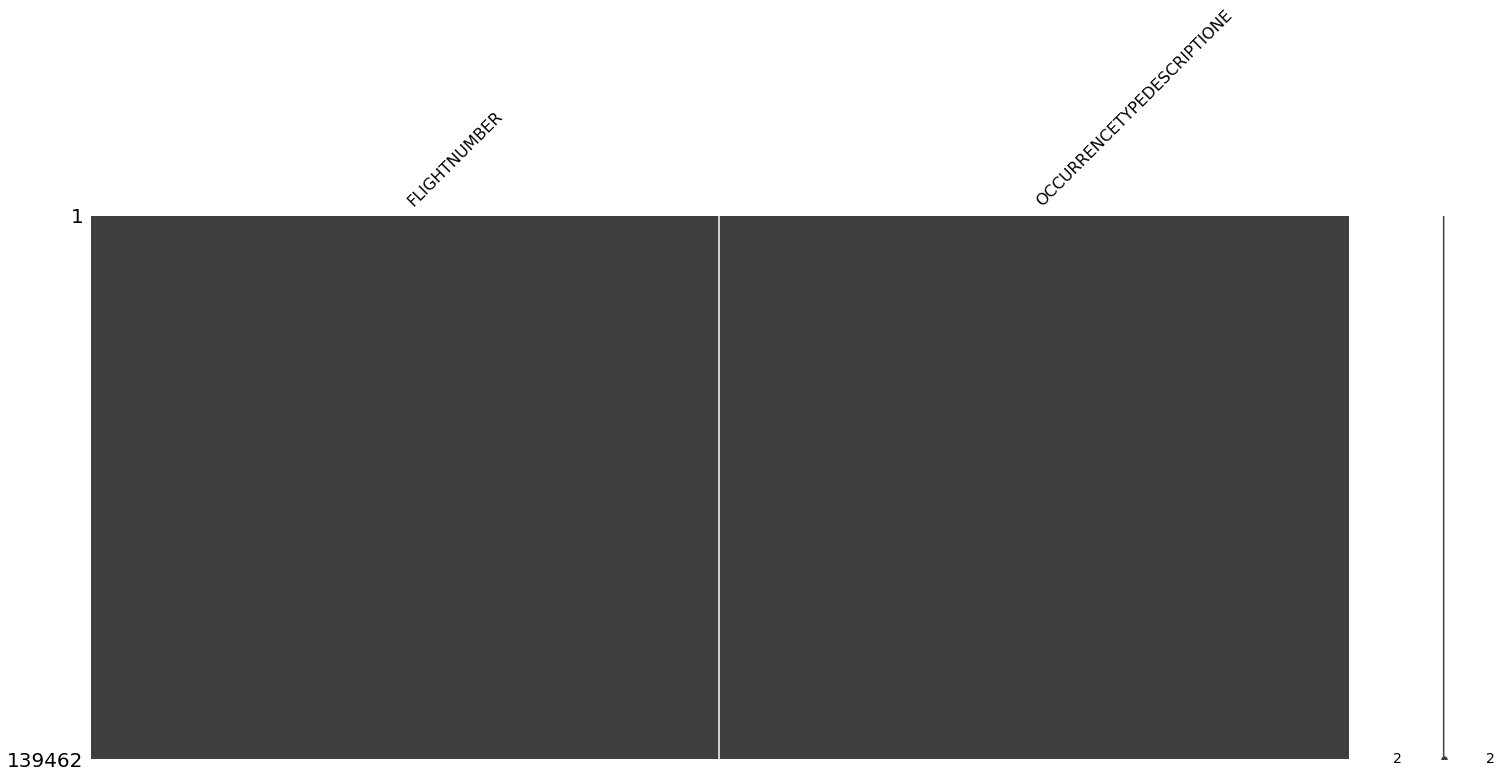

In [37]:
data1 = data.dropna()
msno.matrix(data1)

In [38]:
data1.describe(include = 'all').T

,count,unique,top,freq
FLIGHTNUMBER,139462,44119,TW,127
OCCURRENCETYPEDESCRIPTIONE,139462,2,Incident,138868


In [39]:
data1.head(20)

,FLIGHTNUMBER,OCCURRENCETYPEDESCRIPTIONE
0,ACA180,Incident
1,JZA790,Incident
3,FLE1525,Incident
7,POE116,Incident
9,POE390,Incident
10,ACA757,Incident
12,ACA194,Incident
13,EGF3400,Incident
14,BXH 454,Incident
15,WJA2883,Incident


In [40]:
import os
import re
import warnings
warnings.simplefilter("ignore", UserWarning)
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np 
from string import punctuation
from nltk.tokenize import word_tokenize
import nltk

#Need punkt to make text cleaning def properly working
nltk.download('punkt')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, auc, roc_auc_score
from sklearn.externals import joblib
import scipy
from scipy.sparse import hstack
import seaborn as sns
from sklearn.metrics import roc_auc_score
sns.set_style("whitegrid")
sns.set_palette("pastel")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\18195\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\18195\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [41]:
le = LabelEncoder()
data1['TARGET'] = le.fit_transform(data1['OCCURRENCETYPEDESCRIPTIONE'])
data1=data1.drop(['OCCURRENCETYPEDESCRIPTIONE'], axis=1)
data1

,FLIGHTNUMBER,TARGET
0,ACA180,1
1,JZA790,1
3,FLE1525,1
7,POE116,1
9,POE390,1
...,...,...
236872,WJA230,1
236875,ACA421,1
236877,ACA025,1
236879,CJT621,1


In [42]:
data1['TARGET'].value_counts()

1    138868
0       594
Name: TARGET, dtype: int64

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer='char', ngram_range=(1, 2))
X = vectorizer.fit_transform(data1['FLIGHTNUMBER'])
X

<139462x1579 sparse matrix of type '<class 'numpy.int64'>'
	with 1548159 stored elements in Compressed Sparse Row format>

In [44]:
print(vectorizer.get_feature_names())

[' ', ' #', ' (', ' ,', ' 0', ' 1', ' 2', ' 3', ' 4', ' 5', ' 6', ' 7', ' 8', ' 9', ' ?', ' _', ' a', ' b', ' c', ' d', ' e', ' f', ' g', ' h', ' j', ' k', ' l', ' m', ' n', ' o', ' p', ' q', ' r', ' s', ' t', ' u', ' v', ' w', ' z', '!', '!-', '#', '#2', '#9', '(', '(1', '(2', '(3', '(8', '(a', '(b', '(c', '(f', '(g', '(h', '(k', '(m', '(n', '(p', '(s', '(t', '(u', ')', ') ', '+', '+1', '+2', ',', ', ', ',2', ',3', ',5', ',6', '-', '- ', '-0', '-1', '-2', '-3', '-4', '-6', '-7', '-8', '-9', '-a', '-b', '-c', '-d', '-e', '-f', '-g', '-h', '-i', '-k', '-l', '-m', '-o', '-p', '-q', '-t', '-u', '-v', '-z', '.', '. ', '.s', '/', '/1', '/2', '/3', '/4', '/5', '/6', '/7', '/8', '/f', '/h', '/m', '/n', '/t', '0', '0 ', '0#', '0)', '0+', '0-', '0/', '00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '0a', '0b', '0c', '0d', '0e', '0f', '0g', '0h', '0j', '0k', '0l', '0m', '0n', '0p', '0q', '0r', '0s', '0t', '0u', '0v', '0w', '0x', '0z', '1', '1 ', '1#', '1(', '1)', '1+', '1,', '1-', '1/

In [45]:
#VERY SPARCE DATASET
print(X.toarray()[:25,:25])

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [95]:
X.toarray().shape

(139462, 1579)

In [ ]:
A = np.zeros(1579)

for i in range(0, 1579, 1):
    A[i] = sum(X.toarray()[:,i])

In [125]:
H = list(zip(A, vectorizer.get_feature_names()))

In [135]:
len(H)

1579

In [134]:
H[:50]

[(18023.0, ' '),
 (2.0, ' #'),
 (29.0, ' ('),
 (1.0, ' ,'),
 (431.0, ' 0'),
 (3666.0, ' 1'),
 (2509.0, ' 2'),
 (1529.0, ' 3'),
 (1389.0, ' 4'),
 (1583.0, ' 5'),
 (1533.0, ' 6'),
 (1400.0, ' 7'),
 (2167.0, ' 8'),
 (1490.0, ' 9'),
 (1.0, ' ?'),
 (1.0, ' _'),
 (21.0, ' a'),
 (24.0, ' b'),
 (18.0, ' c'),
 (9.0, ' d'),
 (8.0, ' e'),
 (6.0, ' f'),
 (5.0, ' g'),
 (4.0, ' h'),
 (2.0, ' j'),
 (2.0, ' k'),
 (3.0, ' l'),
 (45.0, ' m'),
 (54.0, ' n'),
 (5.0, ' o'),
 (3.0, ' p'),
 (3.0, ' q'),
 (4.0, ' r'),
 (39.0, ' s'),
 (27.0, ' t'),
 (2.0, ' u'),
 (5.0, ' v'),
 (2.0, ' w'),
 (1.0, ' z'),
 (1.0, '!'),
 (1.0, '!-'),
 (16.0, '#'),
 (1.0, '#2'),
 (1.0, '#9'),
 (40.0, '('),
 (3.0, '(1'),
 (2.0, '(2'),
 (1.0, '(3'),
 (1.0, '(8'),
 (1.0, '(a')]

In [136]:
HH = DataFrame(H, columns=['FREQUENCE','N-GRAM'])

In [138]:
HH.head(5)

,FREQUENCE,N-GRAM
0,18023.0,
1,2.0,#
2,29.0,(
3,1.0,","
4,431.0,0


In [141]:
sorted_HH = HH.sort_values(['FREQUENCE'])

In [147]:
#List of top 20 N-GRAM
sorted_HH[-20:]

,FREQUENCE,N-GRAM
705,17247.0,e
1534,17803.0,z
1260,17943.0,s
0,18023.0,
562,19475.0,ac
641,21450.0,ca
1423,24897.0,w
495,33244.0,9
907,33290.0,j
374,37097.0,6


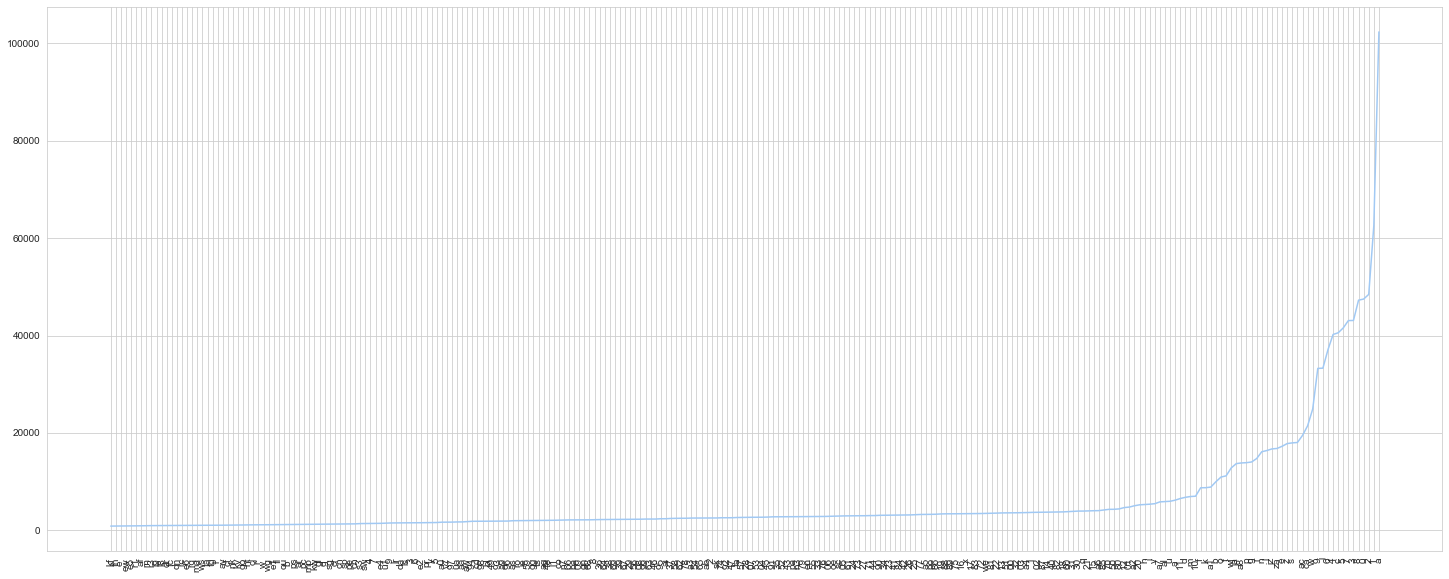

In [151]:
# Among 1,500 N-GRAM, we need a cut-off value putting the treshold between significant importance.

plt.figure(figsize = (25, 10))
#plt.title(i)
plt.plot(sorted_HH[-250:]['N-GRAM'], sorted_HH[-250:]['FREQUENCE'])
#plt.plot(x_val,y_val,'or')
plt.xticks(rotation=90)
plt.show()

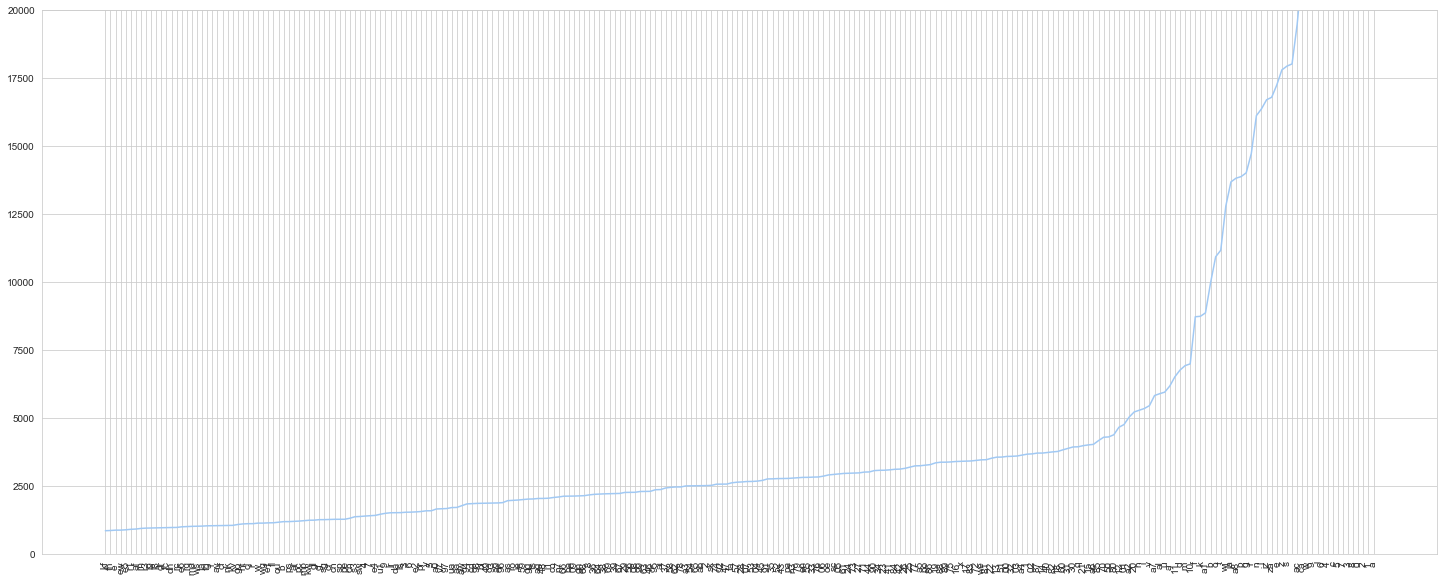

In [156]:
# Zoom of the above graph

# The graph below make it clear that the most important variable are actually 1-gram. The variable names are thinner on
#the right side of the x-axis. 2-gram start later on.

plt.figure(figsize = (25, 10))
#plt.title(i)
plt.plot(sorted_HH[-250:]['N-GRAM'], sorted_HH[-250:]['FREQUENCE'])
#plt.plot(x_val,y_val,'or')
plt.ylim(0, 20000)
plt.xticks(rotation=90)
#plt.axvline(1400, 0, 1, label='pyplot vertical line')
#plt.legend()
plt.show()

In [166]:
# The threshold can be detected at Y-axis = 5,000, this gives us 45 n-gram variable for the analysis

sorted_HH[-45:-44]['FREQUENCE']

1384    5451.0
Name: FREQUENCE, dtype: float64

In [172]:
sorted_HH[-45:]

,FREQUENCE,N-GRAM
1384,5451.0,v
555,5823.0,a7
571,5890.0,al
1344,5947.0,u
545,6174.0,a
170,6514.0,11
667,6759.0,d
1028,6923.0,m
169,6987.0,10
747,8721.0,f


In [ ]:
# Let's start the pca and cluster analysis with a large random dataset of 500 variable.
# that is, let's not consider the filtered dataset made from the 45 most important n-gram.

In [46]:
# Let's put it in a data frame format

ttt = DataFrame(data=X.toarray(), columns=vectorizer.get_feature_names())

In [47]:
ttt.head(20)

,,#,(,",",0,1,2,3,4,5,...,zw,zx,zy,zz,é,é,é1,ég,ì,ìb
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [241]:
from sklearn.decomposition import PCA

AttributeError: module 'seaborn' has no attribute 'plt'

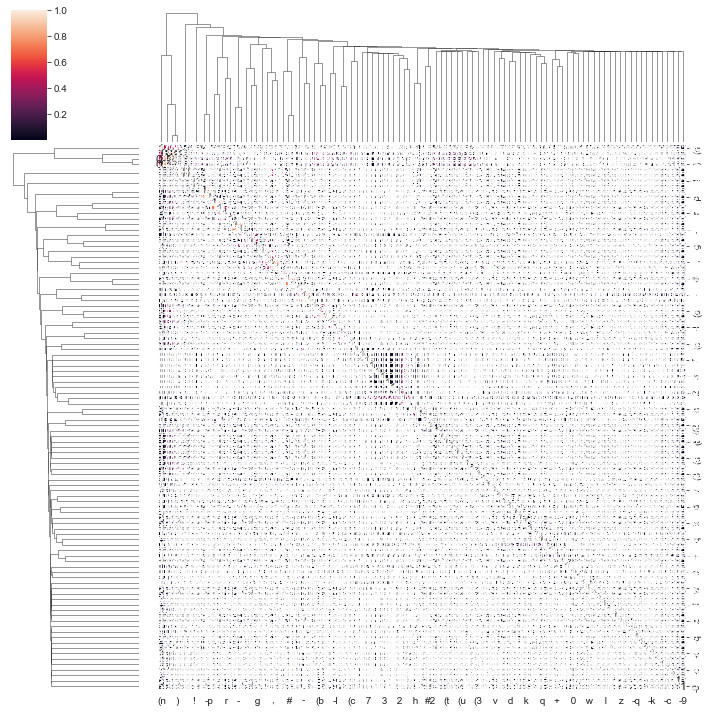

In [49]:
DATA_BINARY = ttt.iloc[:,0:100].corr().abs()
map = sns.clustermap(DATA_BINARY, annot = False, annot_kws = {'size': 12})
sns.plt.setp(map.ax_heatmap.yaxis.get_majorticklabels(),rotation = 0)
sns.plt.show()

In [242]:
DATA_matrix = ttt.iloc[:,0:500].values
#DATA_matrix = ttt.iloc[:,0:500].values
PCA = PCA(n_components=100)
FACTOR_matrix = PCA.fit_transform(DATA_matrix)
FACTOR_DF_PCA_BI = pd.DataFrame(FACTOR_matrix)
FACTOR_DF_PCA_BI.head(20)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.586486,0.508390,-0.087816,1.055438,-0.251812,-0.237814,-0.190903,-0.316046,-0.098875,-0.141050,...,-0.030993,-0.035130,0.008047,0.035840,0.059209,-0.199879,0.055407,0.013811,-0.017201,0.017090
1,-0.336858,-0.184440,-0.713496,-0.062033,-0.755472,-0.374933,-0.213404,-0.008027,0.948379,-0.128669,...,-0.076488,-0.033561,0.001110,-0.049883,0.097354,-0.024587,0.092003,0.030825,0.008850,-0.035053
2,0.458826,-0.226449,0.521365,-0.327169,-0.291873,1.278951,1.455187,-0.372077,-0.283009,-0.241447,...,-0.001596,-0.022987,-0.019514,0.041142,-0.035077,0.029966,0.029503,0.122911,-0.022335,0.004170
3,1.782734,0.245026,0.197689,-0.205569,-0.080693,-0.008990,-0.170060,0.866970,-0.444884,-0.160274,...,-0.003666,-0.024435,-0.026432,0.035032,-0.009113,0.012501,0.032422,0.011433,0.155559,0.005101
4,-0.254631,-0.314748,-0.695600,0.350125,0.499639,-0.539957,0.255231,0.151344,0.929972,-0.151889,...,-0.053605,-0.032501,0.010253,-0.102430,-0.166386,-0.111222,0.114355,0.020919,0.015945,-0.069017
5,-0.591801,0.319276,-0.534692,-1.312637,-1.238271,-0.049065,0.427422,-0.512538,-0.195715,-0.077871,...,0.070719,0.013800,0.016797,-0.023470,0.014162,0.008427,0.004470,-0.004293,0.004689,0.002765
6,0.646514,0.129086,0.022389,-0.349988,0.379125,0.436528,-0.650537,0.068809,0.916616,-0.163733,...,-0.031236,-0.053976,-0.020386,0.011232,0.015825,-0.006746,-0.000080,0.007985,0.014831,-0.083895
7,-0.296380,-0.760953,-1.500984,0.900193,0.722009,-0.149909,-0.511359,-0.565197,-0.086189,-0.186215,...,-0.073771,0.041002,0.003747,-0.035864,-0.100275,-0.081956,0.081116,-0.002542,-0.002596,-0.001447
8,-0.429104,0.104533,-0.412219,-0.591165,0.775068,1.632341,-0.596840,-0.568088,-0.143648,0.873893,...,0.402158,-0.413064,-0.011836,0.088356,-0.061169,0.129413,0.420520,-0.334127,-0.143174,0.060231
9,-0.842371,0.767183,1.265634,0.879013,0.527574,-0.834920,0.207471,-0.478201,-0.304314,-0.074691,...,0.020851,-0.001513,0.157827,0.234014,0.114972,0.087367,-0.045940,-0.013764,-0.012366,0.003292


In [220]:
len(PCA.explained_variance_ratio_)

100

In [221]:
PCA.explained_variance_ratio_

array([0.0950283 , 0.07316463, 0.0700765 , 0.06839829, 0.06625355,
       0.06300508, 0.06227348, 0.05705211, 0.05060406, 0.02427954,
       0.01028164, 0.00889547, 0.00754662, 0.00666491, 0.00625108,
       0.00594408, 0.00585657, 0.00574815, 0.00564946, 0.00558557,
       0.00532812, 0.00529653, 0.00518557, 0.00516626, 0.00514605,
       0.00511081, 0.00503301, 0.00495226, 0.00488624, 0.00483019,
       0.0048123 , 0.0047744 , 0.00473183, 0.00468723, 0.00464948,
       0.00461897, 0.00460176, 0.00456946, 0.00453785, 0.00450622,
       0.00447152, 0.00438445, 0.00435797, 0.00432284, 0.00429302,
       0.00424403, 0.00421644, 0.00419762, 0.00414814, 0.00412266,
       0.00409683, 0.00403457, 0.00398624, 0.00397633, 0.003936  ,
       0.0039044 , 0.00388513, 0.00381897, 0.00377604, 0.00374312,
       0.00370809, 0.00365793, 0.00364991, 0.0036179 , 0.00353696,
       0.00350355, 0.0034692 , 0.00345174, 0.00340809, 0.00335647,
       0.00330434, 0.00326802, 0.00323331, 0.00322175, 0.00317

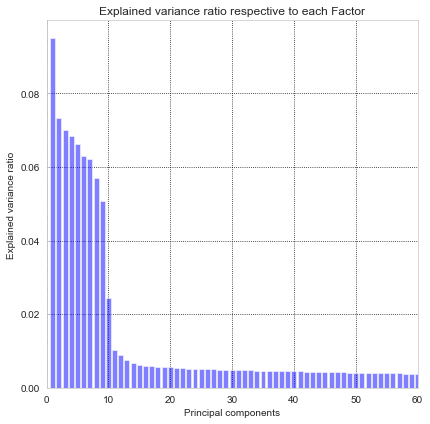

In [243]:
plt.figure(figsize = (6, 6))
plt.bar(range(1, 101), PCA.explained_variance_ratio_, alpha=0.5, align='center', color='b')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Explained variance ratio respective to each Factor')
plt.tight_layout()
plt.grid(color='black', linestyle='dotted')

plt.xlim([0.0,60])
#plt.ylim([0.00,0.21])
plt.show()

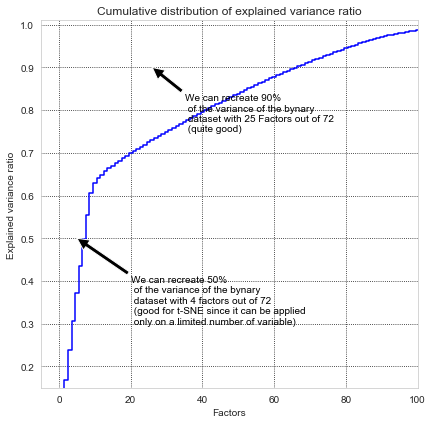

In [223]:
plt.figure(figsize = (6, 6))
plt.step(range(1, 101), np.cumsum(PCA.explained_variance_ratio_), where='mid', color='b')
plt.ylabel('Explained variance ratio')
plt.xlabel('Factors')
plt.title('Cumulative distribution of explained variance ratio')
plt.tight_layout()
plt.grid(color='black', linestyle='dotted')

plt.annotate('We can recreate 90%\n of the variance of the bynary\n dataset with 25 Factors out of 72\n (quite good)', 
xy=(26, 0.90), xytext=(35, 0.75), arrowprops=dict(facecolor='black'), color='black')

plt.annotate('We can recreate 50%\n of the variance of the bynary\n dataset with 4 factors out of 72\n (good for t-SNE since it can be applied\n only on a limited number of variable)', 
xy=(5, 0.5), xytext=(20, 0.30), arrowprops=dict(facecolor='black'), color='black')

plt.xlim([-5,100])
plt.ylim([0.15,1.01])
plt.show()

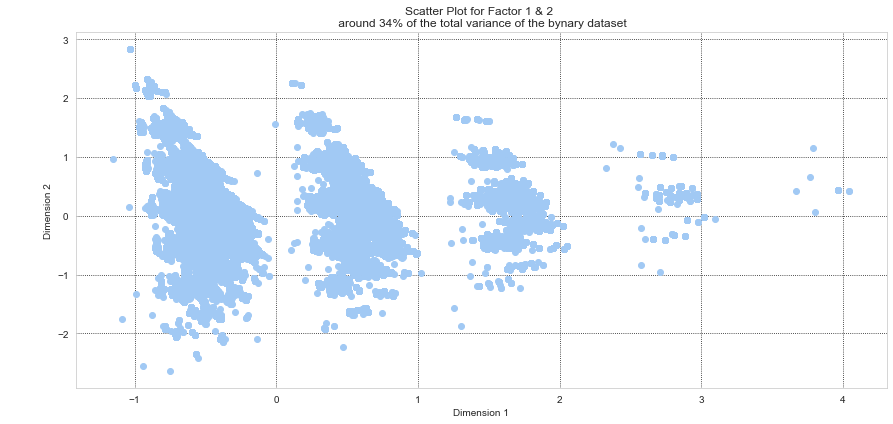

In [251]:
# We get 3 distinct clusters, even considering the large random sample of 500 variables, 
# and the low ratio of variance explained

plt.figure(figsize = (12, 6))
plt.scatter(FACTOR_DF_PCA_BI[0],FACTOR_DF_PCA_BI[1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Scatter Plot for Factor 1 & 2 \n around 34% of the total variance of the bynary dataset')
plt.tight_layout()
plt.grid(color='black', linestyle='dotted')

plt.annotate('6 clusters of data can be observed and we did not even use t-SNE yet', 
xy=(-1.9, -2.3), xytext=(-1.9, -2.3), color='black')

#plt.ylim([-2.5,2.5])
#plt.xlim([-2.5,2.5])
plt.show();

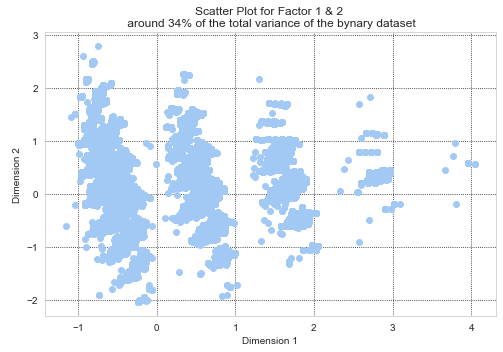

In [229]:
plt.figure(figsize = (7, 5))
plt.scatter(FACTOR_DF_PCA_BI[0],FACTOR_DF_PCA_BI[2])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Scatter Plot for Factor 1 & 2 \n around 34% of the total variance of the bynary dataset')
plt.tight_layout()
plt.grid(color='black', linestyle='dotted')

plt.annotate('6 clusters of data can be observed and we did not even use t-SNE yet', 
xy=(-1.9, -2.3), xytext=(-1.9, -2.3), color='black')

#plt.ylim([-2.5,2.5])
#plt.xlim([-2.5,2.5])
plt.show();

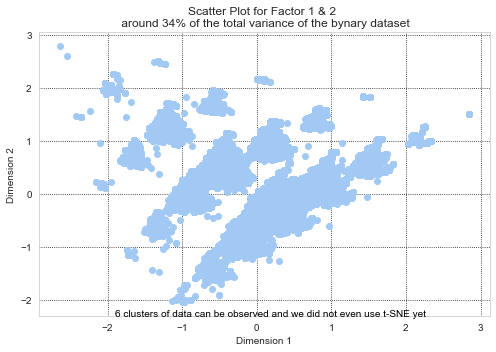

In [228]:
plt.figure(figsize = (7, 5))
plt.scatter(FACTOR_DF_PCA_BI[1],FACTOR_DF_PCA_BI[2])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Scatter Plot for Factor 1 & 2 \n around 34% of the total variance of the bynary dataset')
plt.tight_layout()
plt.grid(color='black', linestyle='dotted')

plt.annotate('6 clusters of data can be observed and we did not even use t-SNE yet', 
xy=(-1.9, -2.3), xytext=(-1.9, -2.3), color='black')

#plt.ylim([-2.5,2.5])
#plt.xlim([-2.5,2.5])
plt.show();

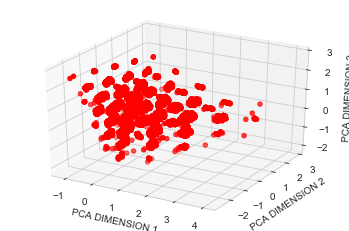

In [235]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = FACTOR_DF_PCA_BI[0]
y = FACTOR_DF_PCA_BI[1]
z = FACTOR_DF_PCA_BI[2]

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('PCA DIMENSION 1')
ax.set_ylabel('PCA DIMENSION 2')
ax.set_zlabel('PCA DIMENSION 3')

plt.show()

In [ ]:
# Let's now color the scatter plot according to the target variable, which accident/incident.
# Accidents are black dots below.

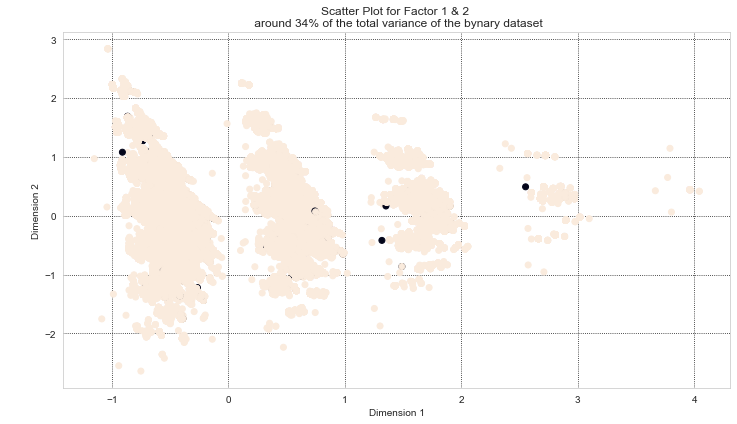

In [244]:
plt.figure(figsize = (10, 6))
plt.scatter(FACTOR_DF_PCA_BI[0],FACTOR_DF_PCA_BI[1], c=data1['TARGET'])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Scatter Plot for Factor 1 & 2 \n around 34% of the total variance of the bynary dataset')
plt.tight_layout()
plt.grid(color='black', linestyle='dotted')

plt.annotate('6 clusters of data can be observed and we did not even use t-SNE yet', 
xy=(-1.9, -2.3), xytext=(-1.9, -2.3), color='black')

#plt.ylim([-2.5,2.5])
#plt.xlim([-2.5,2.5])
plt.show();

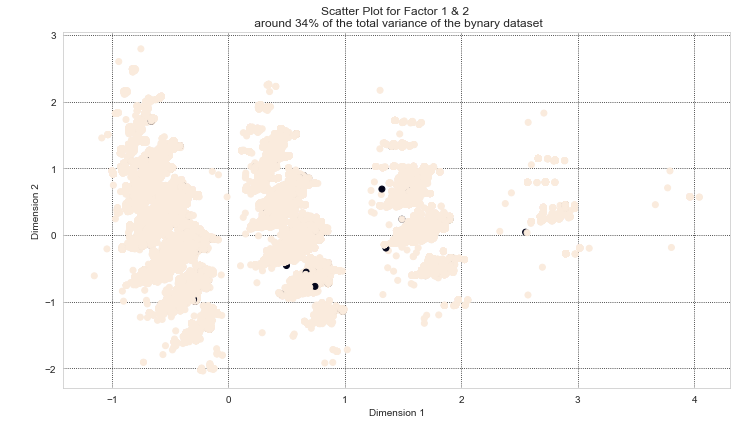

In [246]:
plt.figure(figsize = (10, 6))
plt.scatter(FACTOR_DF_PCA_BI[0],FACTOR_DF_PCA_BI[2], c=data1['TARGET'])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Scatter Plot for Factor 1 & 2 \n around 34% of the total variance of the bynary dataset')
plt.tight_layout()
plt.grid(color='black', linestyle='dotted')

plt.annotate('6 clusters of data can be observed and we did not even use t-SNE yet', 
xy=(-1.9, -2.3), xytext=(-1.9, -2.3), color='black')

#plt.ylim([-2.5,2.5])
#plt.xlim([-2.5,2.5])
plt.show();

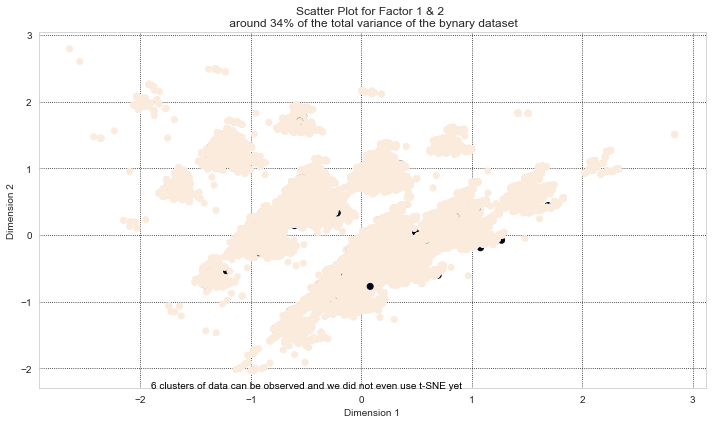

In [247]:
plt.figure(figsize = (10, 6))
plt.scatter(FACTOR_DF_PCA_BI[1],FACTOR_DF_PCA_BI[2], c=data1['TARGET'])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Scatter Plot for Factor 1 & 2 \n around 34% of the total variance of the bynary dataset')
plt.tight_layout()
plt.grid(color='black', linestyle='dotted')

plt.annotate('6 clusters of data can be observed and we did not even use t-SNE yet', 
xy=(-1.9, -2.3), xytext=(-1.9, -2.3), color='black')

#plt.ylim([-2.5,2.5])
#plt.xlim([-2.5,2.5])
plt.show();

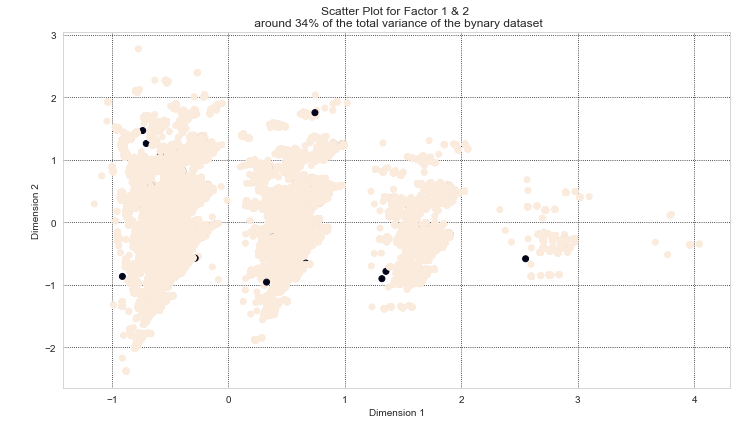

In [248]:
plt.figure(figsize = (10, 6))
plt.scatter(FACTOR_DF_PCA_BI[0],FACTOR_DF_PCA_BI[3], c=data1['TARGET'])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Scatter Plot for Factor 1 & 2 \n around 34% of the total variance of the bynary dataset')
plt.tight_layout()
plt.grid(color='black', linestyle='dotted')

plt.annotate('6 clusters of data can be observed and we did not even use t-SNE yet', 
xy=(-1.9, -2.3), xytext=(-1.9, -2.3), color='black')

#plt.ylim([-2.5,2.5])
#plt.xlim([-2.5,2.5])
plt.show();

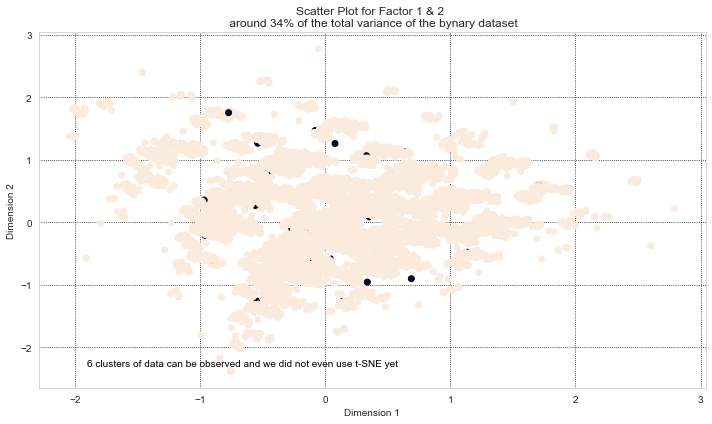

In [249]:
plt.figure(figsize = (10, 6))
plt.scatter(FACTOR_DF_PCA_BI[2],FACTOR_DF_PCA_BI[3], c=data1['TARGET'])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Scatter Plot for Factor 1 & 2 \n around 34% of the total variance of the bynary dataset')
plt.tight_layout()
plt.grid(color='black', linestyle='dotted')

plt.annotate('6 clusters of data can be observed and we did not even use t-SNE yet', 
xy=(-1.9, -2.3), xytext=(-1.9, -2.3), color='black')

#plt.ylim([-2.5,2.5])
#plt.xlim([-2.5,2.5])
plt.show();

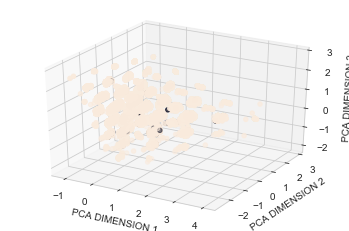

In [250]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = FACTOR_DF_PCA_BI[0]
y = FACTOR_DF_PCA_BI[1]
z = FACTOR_DF_PCA_BI[2]

ax.scatter(x, y, z, c=data1['TARGET'], marker='o')

ax.set_xlabel('PCA DIMENSION 1')
ax.set_ylabel('PCA DIMENSION 2')
ax.set_zlabel('PCA DIMENSION 3')

plt.show()

In [58]:
#Eigen vectors has 100 vector, where each vector has 500 coefficient
#each of the 500 coefficient of a vector represent the relative importance of a variable
#There is 500 variables in total
PCA.components_.shape

(100, 500)

In [59]:
#vector 1
PCA.components_[0,:]

array([ 2.43540309e-02, -7.10397466e-06,  4.37297753e-05, -3.12849662e-06,
        2.20679149e-04,  5.58397925e-02, -6.48811987e-03, -3.27885945e-03,
       -4.25105283e-03, -2.80003544e-03, -2.76016931e-03, -4.50243769e-03,
       -8.41737416e-03, -1.47454230e-04, -1.62382584e-06, -1.62431378e-06,
        5.35288902e-05,  5.68628405e-05,  2.57076646e-05,  2.99689998e-05,
        4.77501823e-06,  4.36573109e-05, -6.06848479e-06, -1.30574468e-05,
        9.54536285e-06, -8.71873087e-06, -9.18158950e-06,  4.76637261e-04,
       -3.25145341e-05,  3.68336024e-06,  2.32751603e-05,  3.32375818e-05,
        1.21256511e-05,  5.12785947e-05,  1.66836014e-04,  2.82531182e-06,
        8.48653810e-08, -1.40521362e-05, -1.62382584e-06, -1.97462871e-06,
       -1.97462871e-06,  1.64473351e-05, -3.63727748e-06, -4.35060749e-06,
        1.55978600e-04,  8.19230889e-05,  3.31204047e-05,  9.47592197e-06,
        5.69587485e-06,  1.97773673e-05, -4.53203881e-05, -1.23815263e-05,
        1.37000992e-05, -

In [60]:
#vector 2
PCA.components_[1,:]

array([-2.70981429e-02,  7.19544695e-07, -5.00893950e-05,  2.55452931e-06,
       -3.00816157e-03,  1.06906193e-03, -3.74082073e-02, -5.88114239e-03,
       -1.77146235e-03,  2.64397369e-03, -2.89310318e-03, -1.99646420e-03,
        2.47826077e-02, -1.98567066e-03, -1.09605867e-06, -1.11185006e-06,
        2.61483023e-05, -7.51407238e-05, -2.99153022e-05,  5.15795164e-06,
       -4.70378932e-06, -1.30603749e-05, -6.43455219e-06, -3.62070010e-06,
       -3.57779401e-07, -1.59428480e-05, -2.70217196e-05, -2.18505660e-04,
       -1.14454218e-04, -3.63870702e-06, -1.36274863e-05, -1.82460685e-05,
       -2.54478826e-05, -1.05369086e-05, -1.70452045e-05, -2.79528342e-05,
       -9.47644740e-06,  4.36768467e-06, -1.09605867e-06, -6.10872725e-07,
       -6.10872725e-07, -7.93623974e-05, -1.21925883e-05,  1.02720083e-06,
       -8.60777369e-05,  1.21495609e-05, -1.73487825e-05,  3.88437978e-07,
        7.34322747e-07, -1.93837884e-05,  7.87386387e-05, -3.12487996e-05,
        1.62840515e-05, -

In [61]:
#verification
print(len(PCA.components_[0,:]))
print(len(PCA.components_[1,:]))
print(len(vectorizer.get_feature_names()[:500]))

500
500
500


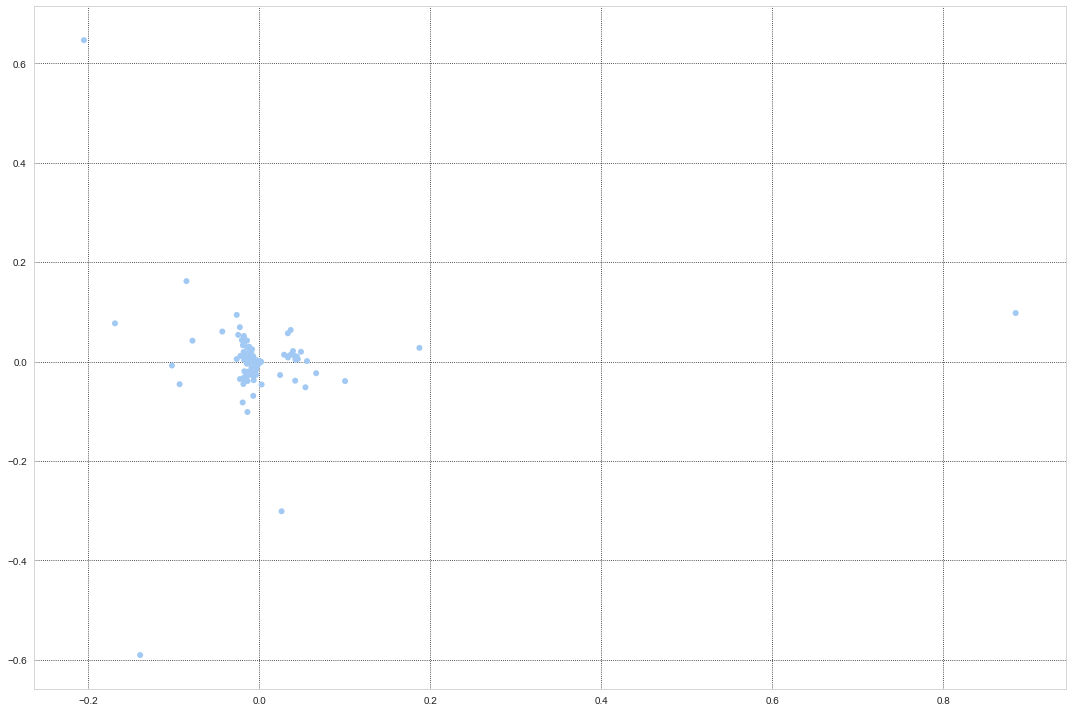

In [62]:
#PLOTTING BOTH VECTOR IN 1 SCATTER PLOT GRAPH
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(PCA.components_[0,:], PCA.components_[1,:], edgecolor='none')
plt.tight_layout()
plt.grid(color='black', linestyle='dotted')
plt.show();

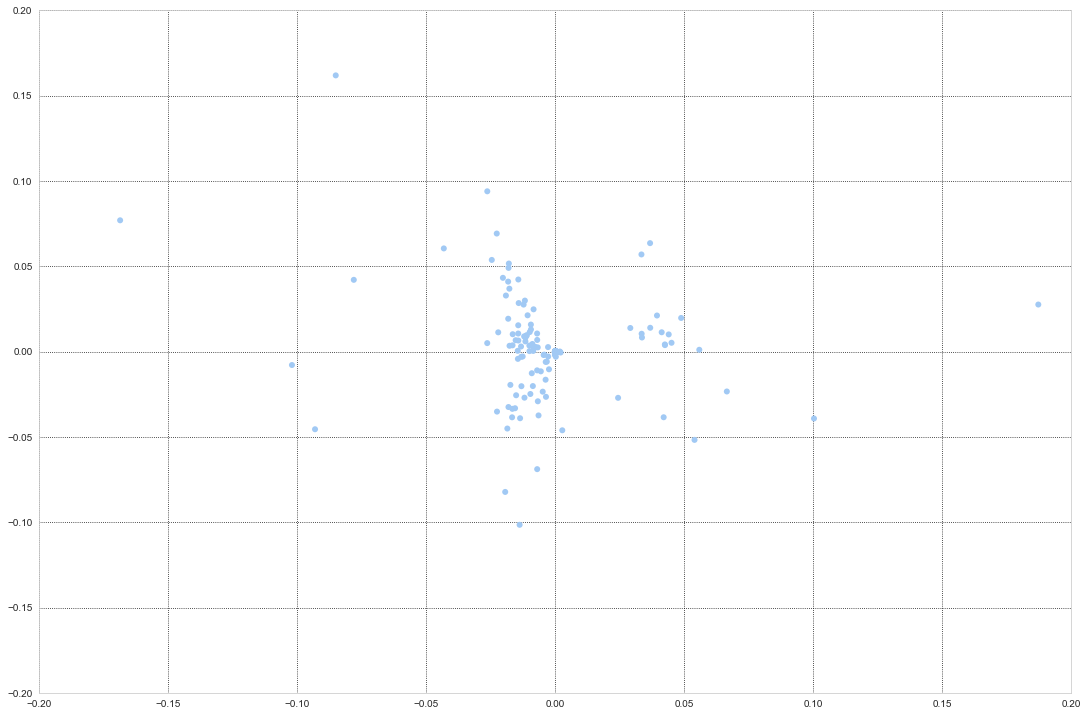

In [63]:
# PLOTTING BOTH VECTOR IN 1 SCATTER PLOT GRAPH (Zooming)
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(PCA.components_[0,:], PCA.components_[1,:], edgecolor='none')
plt.tight_layout()
plt.grid(color='black', linestyle='dotted')
plt.xlim([-0.2,0.2])
plt.ylim([-0.2,0.2])
plt.show();

In [ ]:
# Now, same analysis with the top 45 N-gram detected earlier

In [181]:
e = sorted_HH[-45:]['N-GRAM'].tolist()

In [182]:
e

['v',
 'a7',
 'al',
 'u',
 'a ',
 '11',
 'd',
 'm',
 '10',
 'f',
 'k',
 'a1',
 'b',
 'o',
 't',
 'wj',
 'ja',
 'a8',
 'p',
 'g',
 'r',
 'n',
 'l',
 'jz',
 'za',
 'e',
 'z',
 's',
 ' ',
 'ac',
 'ca',
 'w',
 '9',
 'j',
 '6',
 '4',
 'c',
 '5',
 '7',
 '3',
 '8',
 '0',
 '2',
 '1',
 'a']

In [186]:
q = ttt.filter(e)

In [188]:
print(q)

        v  a7  al  u  a   11  d  m  10  f  ...  4  c  5  7  3  8  0  2  1  a
0       0   0   0  0   0   0  0  0   0  0  ...  0  1  0  0  0  1  1  0  1  2
1       0   1   0  0   0   0  0  0   0  0  ...  0  0  0  1  0  0  1  0  0  1
2       0   0   0  0   0   0  0  0   0  1  ...  0  0  2  0  0  0  0  1  1  0
3       0   0   0  0   0   1  0  0   0  0  ...  0  0  0  0  0  0  0  0  2  0
4       0   0   0  0   0   0  0  0   0  0  ...  0  0  0  0  1  0  1  0  0  0
...    ..  ..  .. ..  ..  .. .. ..  .. ..  ... .. .. .. .. .. .. .. .. .. ..
139457  0   0   0  0   0   0  0  0   0  0  ...  0  0  0  0  1  0  1  1  0  1
139458  0   0   0  0   0   0  0  0   0  0  ...  1  1  0  0  0  0  0  1  1  2
139459  0   0   0  0   0   0  0  0   0  0  ...  0  1  1  0  0  0  1  1  0  2
139460  0   0   0  0   0   0  0  0   0  0  ...  0  1  0  0  0  0  0  1  1  0
139461  0   0   0  0   0   0  0  0   0  0  ...  0  1  0  0  2  0  0  0  0  0

[139462 rows x 45 columns]


AttributeError: module 'seaborn' has no attribute 'plt'

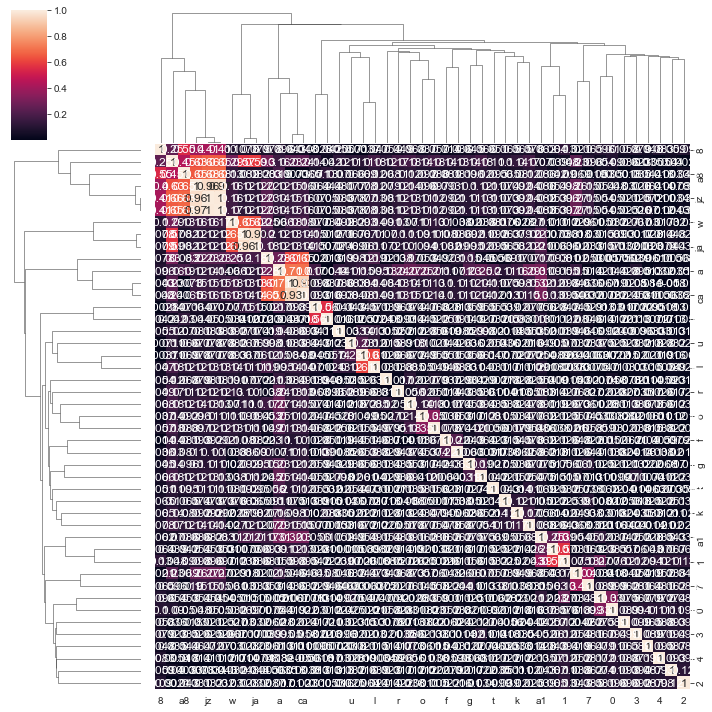

In [189]:
DATA_BINARY = q.corr().abs()
map = sns.clustermap(DATA_BINARY, annot = False, annot_kws = {'size': 12})
sns.plt.setp(map.ax_heatmap.yaxis.get_majorticklabels(),rotation = 0)
sns.plt.show()

In [236]:
from sklearn.decomposition import PCA

DATA_matrix = q.values
PCA = PCA(n_components=45)
FACTOR_matrix = PCA.fit_transform(DATA_matrix)
FACTOR_DF_PCA_BI = pd.DataFrame(FACTOR_matrix)
FACTOR_DF_PCA_BI.head(20)

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,1.929232,-0.813783,0.148607,-0.708175,-0.316341,-0.326537,0.479421,0.195753,0.014033,-0.190447,...,-0.263350,-0.035618,0.009550,0.017981,-0.040935,-0.003269,0.003951,-0.003212,0.000644,-0.001501
1,0.388966,1.404360,-0.031116,-0.236212,0.680855,0.590684,0.987887,0.411564,0.249463,0.001730,...,0.004155,0.206545,-0.061455,0.109228,-0.026177,-0.045795,0.007478,-0.028091,-0.002294,0.002272
2,-0.851216,-0.441293,0.339179,0.166901,-0.250143,0.199348,-0.196571,-1.254828,-1.127671,-0.680495,...,-0.207354,0.049223,-0.038010,0.095155,0.161009,0.090694,-0.020203,0.008358,0.007431,-0.000226
3,-0.703049,-0.868361,1.561765,-0.577021,-0.011394,0.174018,-0.286508,-0.253860,0.150742,0.800332,...,0.333559,0.004817,0.035446,-0.004614,-0.019152,-0.037077,-0.004481,-0.026417,-0.000530,0.000447
4,-1.116163,-0.223309,-0.353676,-0.359230,-0.119302,-0.554239,0.294733,0.644828,-0.137665,0.175490,...,-0.034100,-0.000565,0.038042,0.032751,-0.033050,-0.036084,-0.018532,-0.018244,0.004231,-0.002248
5,1.665887,-0.396713,-1.052357,0.080514,1.632573,0.961845,0.128389,-0.155733,-0.477619,-0.574159,...,0.023278,0.349723,-0.149052,0.251040,-0.099344,-0.036966,0.046262,0.019782,-0.000828,-0.002191
6,1.831268,-1.114185,0.018980,-0.112381,0.209754,-0.184615,-0.544650,-0.211288,0.714828,0.036047,...,-0.190292,-0.007622,-0.027469,0.053149,-0.062279,-0.011338,0.015952,0.002333,0.002865,-0.001140
7,-1.202700,-0.312540,-0.553875,-0.343978,-0.116698,-0.970574,0.944532,0.795071,0.709408,-0.649575,...,-0.103478,0.031595,0.130123,0.141491,-0.038407,-0.043024,-0.023900,0.012214,0.010785,-0.001987
8,-0.822828,-0.102060,-0.434902,0.218782,0.376833,-0.758506,-0.509596,-1.144718,0.924892,-0.737074,...,0.038663,0.232460,-0.206668,-0.244978,-0.211151,-0.259859,0.043011,-0.048670,-0.021459,-0.004119
9,0.258501,1.210020,0.268544,1.153360,-1.043040,-0.434212,-0.392044,0.609271,-0.372053,-0.138005,...,0.039123,0.036163,0.145580,-0.151318,0.131256,-0.021420,-0.005754,-0.012286,0.018237,-0.002034


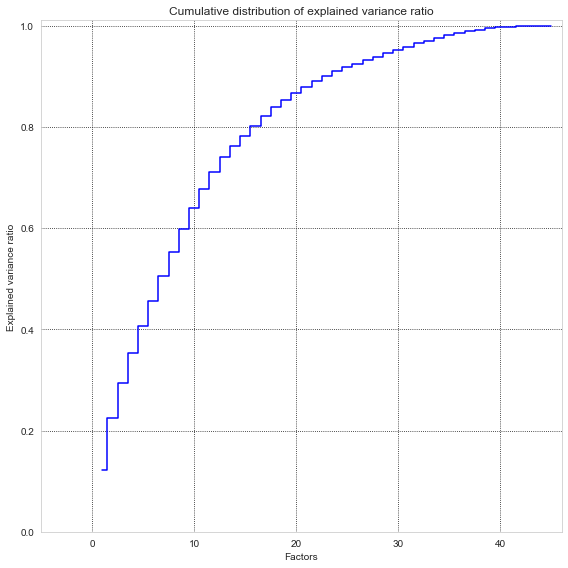

In [237]:
# The top 45 n-gram offer more structure in the dataset compare to the random sample of 500 n-gram dataset.
# Therefore, we notice a more stable progression regarding the cumulative eigenvalues fonction.
# Also, The first 2 PCA factor cover a larger proportion of variance. That is, around 30%. This is not that high.
# But still interesting considering we are parsing 'random' aircraft flight numbers.

plt.figure(figsize = (8, 8))
plt.step(range(1, 46), np.cumsum(PCA.explained_variance_ratio_), where='mid', color='b')
plt.ylabel('Explained variance ratio')
plt.xlabel('Factors')
plt.title('Cumulative distribution of explained variance ratio')
plt.tight_layout()
plt.grid(color='black', linestyle='dotted')

plt.xlim([-5,46])
plt.ylim([0.0,1.01])
plt.show()

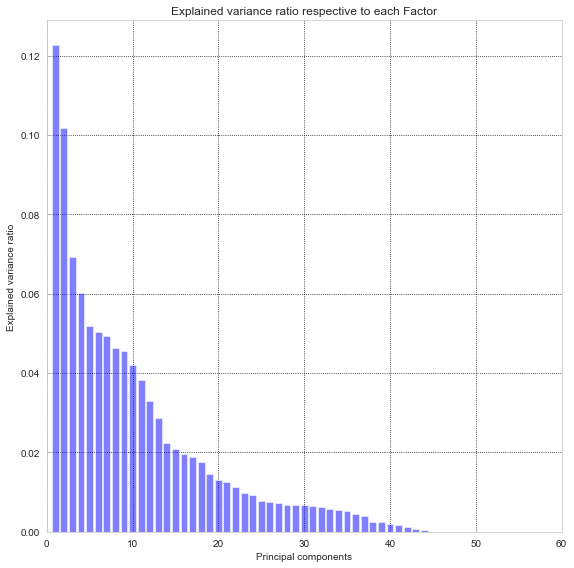

In [238]:
plt.figure(figsize = (8, 8))
plt.bar(range(1, 46), PCA.explained_variance_ratio_, alpha=0.5, align='center', color='b')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Explained variance ratio respective to each Factor')
plt.tight_layout()
plt.grid(color='black', linestyle='dotted')

plt.xlim([0.0,60])
#plt.ylim([0.00,0.21])
plt.show()

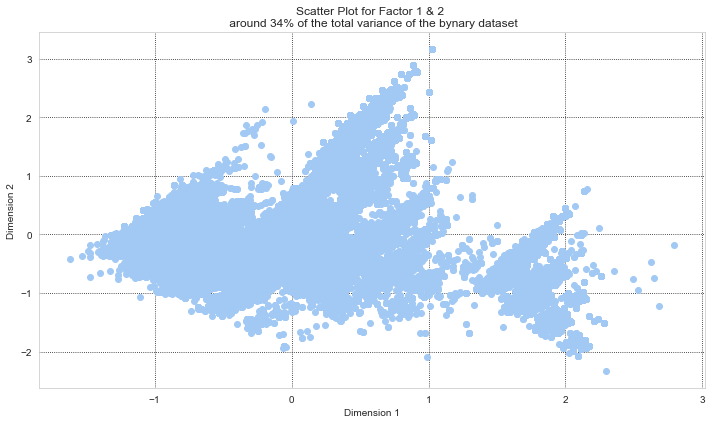

In [199]:
# The number of cluster is reasonably similar to 3, as detected earlier

plt.figure(figsize = (10, 6))
plt.scatter(FACTOR_DF_PCA_BI[0],FACTOR_DF_PCA_BI[1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Scatter Plot for Factor 1 & 2 \n around 34% of the total variance of the bynary dataset')
plt.tight_layout()
plt.grid(color='black', linestyle='dotted')

plt.annotate('6 clusters of data can be observed and we did not even use t-SNE yet', 
xy=(-1.9, -2.3), xytext=(-1.9, -2.3), color='black')

#plt.ylim([-2.5,2.5])
#plt.xlim([-2.5,2.5])

plt.show();

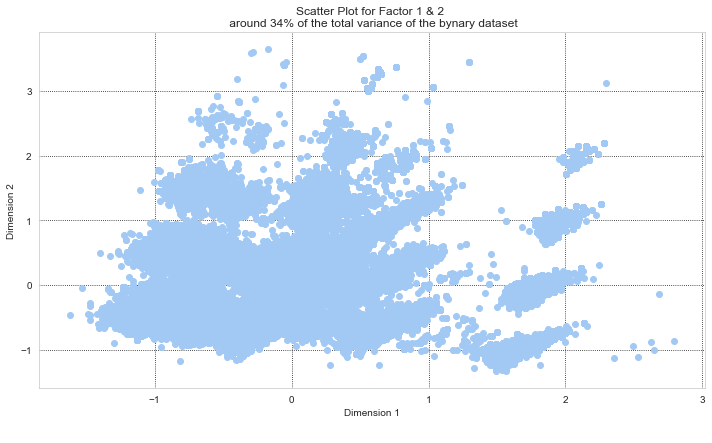

In [200]:
plt.figure(figsize = (10, 6))
plt.scatter(FACTOR_DF_PCA_BI[0],FACTOR_DF_PCA_BI[2])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Scatter Plot for Factor 1 & 2 \n around 34% of the total variance of the bynary dataset')
plt.tight_layout()
plt.grid(color='black', linestyle='dotted')

plt.annotate('6 clusters of data can be observed and we did not even use t-SNE yet', 
xy=(-1.9, -2.3), xytext=(-1.9, -2.3), color='black')

#plt.ylim([-2.5,2.5])
#plt.xlim([-2.5,2.5])

plt.show();

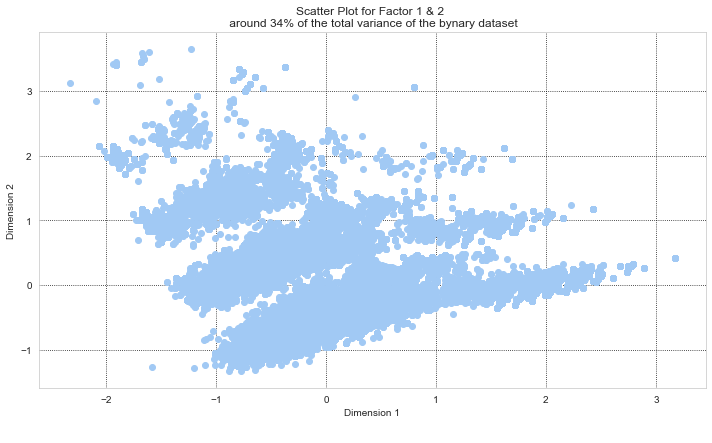

In [201]:
plt.figure(figsize = (10, 6))
plt.scatter(FACTOR_DF_PCA_BI[1],FACTOR_DF_PCA_BI[2])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Scatter Plot for Factor 1 & 2 \n around 34% of the total variance of the bynary dataset')
plt.tight_layout()
plt.grid(color='black', linestyle='dotted')

plt.annotate('6 clusters of data can be observed and we did not even use t-SNE yet', 
xy=(-1.9, -2.3), xytext=(-1.9, -2.3), color='black')

#plt.ylim([-2.5,2.5])
#plt.xlim([-2.5,2.5])

plt.show();

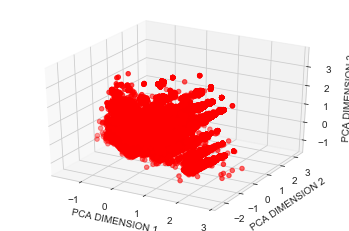

In [239]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = FACTOR_DF_PCA_BI[0]
y = FACTOR_DF_PCA_BI[1]
z = FACTOR_DF_PCA_BI[2]

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('PCA DIMENSION 1')
ax.set_ylabel('PCA DIMENSION 2')
ax.set_zlabel('PCA DIMENSION 3')

plt.show()

In [202]:
PCA.components_.shape

(45, 45)

In [203]:
#vector 1
PCA.components_[0,:]

array([-2.30322851e-02,  3.48345941e-02,  1.03531512e-02, -2.63393726e-02,
        3.90510214e-02,  4.08534595e-02, -3.15760737e-02, -3.49036485e-02,
       -3.09656390e-03, -3.43284743e-02, -5.04065354e-02,  9.74546378e-02,
       -3.32138980e-02, -7.40276399e-02, -6.16778293e-02,  2.07241944e-02,
        2.30806661e-02,  9.87148503e-02, -7.82884362e-02, -1.03773490e-01,
       -8.80036528e-02, -1.02808753e-01, -6.16158570e-02,  8.66617608e-02,
        8.76660279e-02, -1.18897796e-01,  8.32502654e-02, -1.19292301e-01,
       -1.10031877e-02,  3.01187016e-01,  3.13243896e-01, -5.95029755e-02,
        1.55546100e-02,  9.88482393e-02,  2.24093030e-02, -3.32387173e-02,
        2.36056387e-01,  1.06684036e-04, -5.99055757e-03, -9.63053822e-02,
        1.32237664e-01, -5.19581201e-02, -3.29183491e-02,  1.08571189e-01,
        7.52339693e-01])

In [204]:
#vector 2
PCA.components_[2,:]

array([-1.75014109e-02, -1.22906584e-02, -7.89167166e-04,  1.93719792e-02,
        2.14669668e-02,  1.70763918e-01,  4.20532853e-03, -7.30758925e-03,
        8.08407073e-02, -2.18748735e-02, -1.39609817e-02,  1.20799672e-01,
       -7.66421048e-03,  5.71930132e-03, -1.84263113e-02,  1.38877926e-01,
        1.42059347e-01,  3.65293970e-02, -1.14086172e-02, -3.73778266e-02,
        2.85686122e-03, -2.08896754e-02, -1.02059053e-02,  7.13128166e-02,
        7.08112949e-02, -1.19285962e-02,  7.00218572e-02, -3.09153257e-02,
        1.02923558e-02, -1.23873817e-01, -1.34599220e-01,  1.56933636e-01,
       -4.10748736e-02,  2.19739085e-01, -7.51923722e-02, -1.16805705e-01,
       -1.86852325e-01, -6.05991875e-02, -1.10981770e-01, -8.07597893e-02,
        4.26509884e-02, -7.09047070e-02, -1.65859432e-01,  8.13565029e-01,
       -8.44297617e-02])

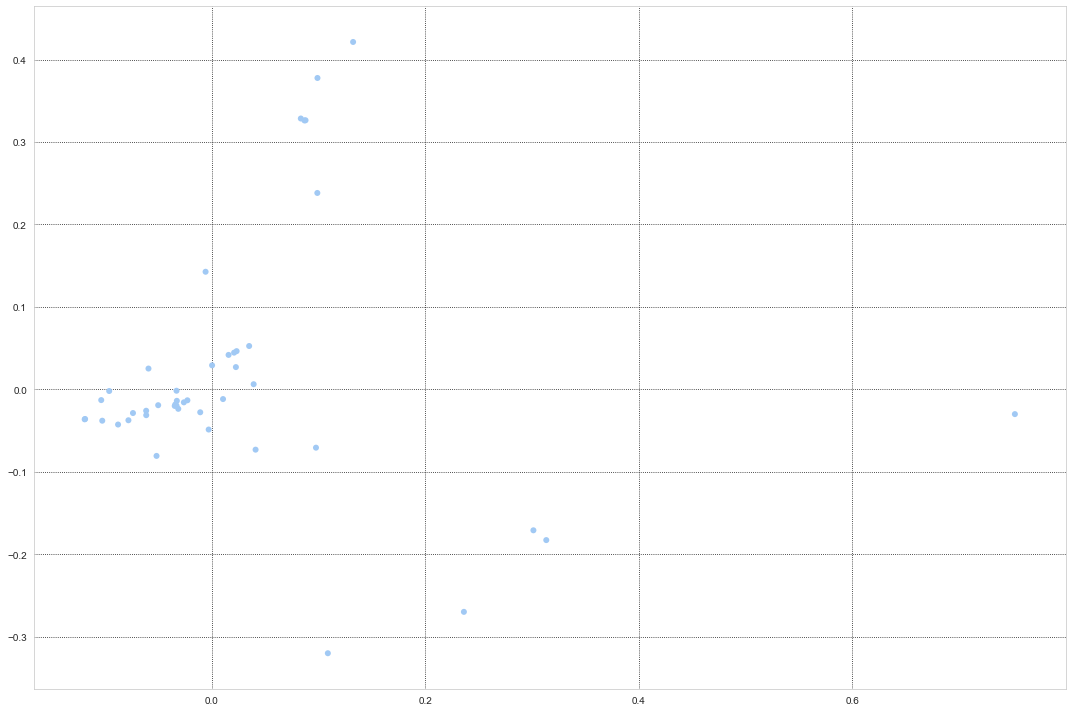

In [205]:
#PLOTTING BOTH VECTOR IN 1 SCATTER PLOT GRAPH
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(PCA.components_[0,:], PCA.components_[1,:], edgecolor='none')
plt.tight_layout()
plt.grid(color='black', linestyle='dotted')
plt.show();

In [ ]:
#---------------------------------------------------------------------------------//--------------------------#

In [ ]:
#-----------------------------------------------------------------------//------------------------------------#

In [ ]:
#-----------------------------------------------------------------//------------------------------------------#

In [ ]:
#----------------------------------------------------------//-------------------------------------------------#

In [64]:
#LET'S NOW TRY WITH TF-IDF, INSTEAD OF A SIMPLE COUNTER
#we also use 1-gram only.

from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(analyzer='char', ngram_range=(1,1))

In [65]:
Y = vec.fit_transform(data1['FLIGHTNUMBER'])

In [66]:
Y

<139462x52 sparse matrix of type '<class 'numpy.float64'>'
	with 804231 stored elements in Compressed Sparse Row format>

In [67]:
print(vec.get_feature_names())

[' ', '!', '#', '(', ')', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', '?', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'é', 'ì']


In [68]:
len(vec.get_feature_names())

52

In [69]:
#wE OBVIOUSLY GET A less SPARCE DATASET
Y.toarray()[:6,:25]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.40893291, 0.37196753, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.41820915, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.58191068],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.37231339, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.39524394, 0.        , 0.43317409,
        0.        , 0.        , 0.        , 0.        , 0.26490059],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.24672069, 0.27155261, 0.        , 0.        ,
        0.57729818, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.

In [70]:
tttt = DataFrame(data=Y.toarray(), columns=vec.get_feature_names())

In [71]:
tttt.head(20)

,,!,#,(,),+,",",-,.,/,...,s,t,u,v,w,x,y,z,é,ì
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.00000,0.000000,0.00000,0.0,0.000000,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.00000,0.000000,0.00000,0.0,0.523571,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.00000,0.000000,0.00000,0.0,0.000000,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.00000,0.000000,0.00000,0.0,0.000000,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.00000,0.000000,0.00000,0.0,0.000000,0.0,0.0
5,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.00000,0.000000,0.00000,0.0,0.000000,0.0,0.0
6,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.00000,0.000000,0.00000,0.0,0.000000,0.0,0.0
7,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.00000,0.000000,0.00000,0.0,0.000000,0.0,0.0
8,0.319228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.00000,0.000000,0.49717,0.0,0.000000,0.0,0.0
9,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.00000,0.408061,0.00000,0.0,0.000000,0.0,0.0


AttributeError: module 'seaborn' has no attribute 'plt'

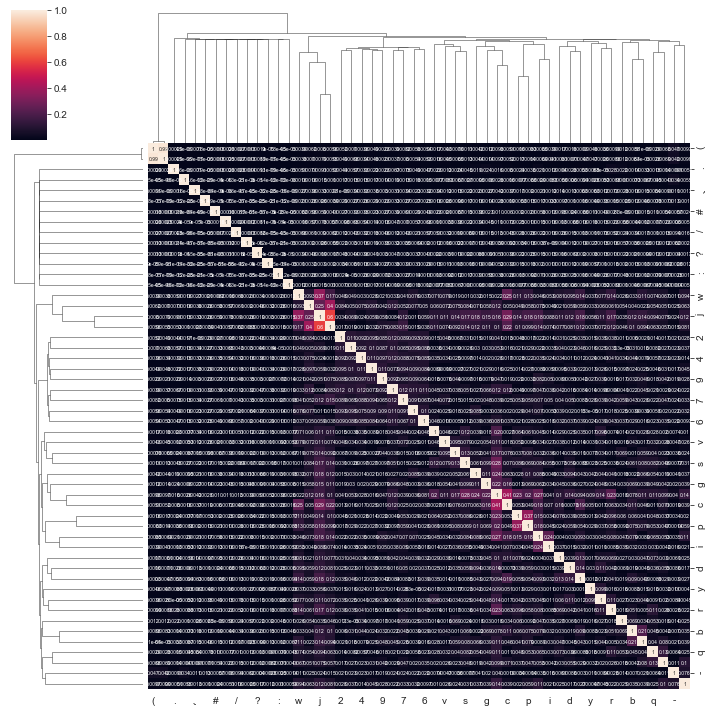

In [72]:
DATA_BINARY = tttt.iloc[:,0:52].corr().abs()
map = sns.clustermap(DATA_BINARY, annot = False, annot_kws = {'size': 5})
sns.plt.setp(map.ax_heatmap.yaxis,rotation = 0)
sns.plt.show()

In [74]:
from sklearn.decomposition import PCA

DATA_matrix = tttt.values
#DATA_matrix = ttt.iloc[:,0:500].values
PCA = PCA(n_components=52)
FACTOR_matrix = PCA.fit_transform(DATA_matrix)
FACTOR_DF_PCA_BI = pd.DataFrame(FACTOR_matrix)
FACTOR_DF_PCA_BI.head(20)

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,0.270735,0.540553,-0.126269,0.240422,-0.132897,0.009247,0.073304,0.115842,-0.041329,-0.190037,...,0.000364,0.000350,0.000080,0.000213,0.000086,8.273421e-05,0.000048,0.000045,0.000019,-1.236873e-05
1,0.429467,-0.213396,-0.216601,0.017039,0.289219,0.093673,-0.146982,-0.041865,0.011540,-0.014490,...,-0.000027,-0.000125,-0.000037,0.000022,-0.000021,-5.228061e-05,-0.000038,0.000010,-0.000003,1.330619e-05
2,-0.248870,-0.049050,0.072856,0.065423,0.038179,-0.049688,0.360046,0.035468,-0.262175,0.176344,...,-0.000182,-0.000041,0.000077,-0.000039,-0.000058,-1.705708e-05,-0.000032,-0.000039,-0.000013,2.213405e-05
3,-0.320074,0.036563,0.052380,0.399367,-0.144250,-0.013652,-0.035896,-0.402500,-0.064309,-0.148645,...,-0.000484,-0.000470,-0.000150,-0.000242,-0.000057,-1.067063e-04,-0.000076,-0.000060,-0.000035,4.606402e-06
4,-0.377471,-0.161670,-0.121412,0.106944,-0.225086,0.034816,0.035553,-0.025670,0.151473,0.025030,...,-0.000135,-0.000024,-0.000013,0.000017,0.000041,9.023642e-07,-0.000054,-0.000013,-0.000008,-7.098704e-07
5,0.205255,0.281943,-0.155431,-0.342215,0.521141,-0.171053,0.011378,0.152789,-0.251618,-0.023432,...,-0.000543,-0.000758,-0.000207,-0.000423,-0.000119,-1.584298e-04,-0.000059,-0.000076,-0.000044,4.142676e-06
6,0.161798,0.551515,0.029566,-0.005293,-0.083713,-0.189367,-0.321941,-0.119266,0.108994,0.328997,...,0.000275,0.000259,0.000089,0.000159,0.000080,5.727996e-05,0.000020,0.000034,0.000017,4.952095e-06
7,-0.355308,-0.160661,-0.024453,-0.068874,-0.205906,-0.106846,-0.043932,0.171793,0.011327,-0.290068,...,0.000011,0.000089,-0.000048,0.000058,0.000011,2.133074e-05,-0.000073,-0.000002,0.000008,1.590464e-05
8,-0.209136,-0.081210,0.008654,-0.138785,-0.150098,-0.330631,-0.025353,-0.045568,-0.141793,0.087488,...,-0.000531,0.000036,-0.000108,-0.000028,0.000077,-5.624757e-05,-0.000050,-0.000039,0.000021,-2.907684e-05
9,0.392927,-0.312244,0.156352,0.052742,-0.289862,0.206028,0.068150,0.269542,0.079225,0.034158,...,-0.000046,-0.000032,0.000001,-0.000060,0.000024,3.056665e-05,0.000055,-0.000003,-0.000006,-2.057633e-05


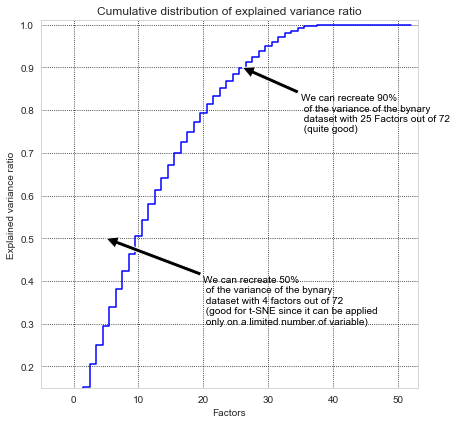

In [75]:
plt.figure(figsize = (6, 6))
plt.step(range(1, 53), np.cumsum(PCA.explained_variance_ratio_), where='mid', color='b')
plt.ylabel('Explained variance ratio')
plt.xlabel('Factors')
plt.title('Cumulative distribution of explained variance ratio')
plt.tight_layout()
plt.grid(color='black', linestyle='dotted')

plt.annotate('We can recreate 90%\n of the variance of the bynary\n dataset with 25 Factors out of 72\n (quite good)', 
xy=(26, 0.90), xytext=(35, 0.75), arrowprops=dict(facecolor='black'), color='black')

plt.annotate('We can recreate 50%\n of the variance of the bynary\n dataset with 4 factors out of 72\n (good for t-SNE since it can be applied\n only on a limited number of variable)', 
xy=(5, 0.5), xytext=(20, 0.30), arrowprops=dict(facecolor='black'), color='black')

plt.xlim([-5,53])
plt.ylim([0.15,1.01])
plt.show()

In [76]:
PCA.explained_variance_ratio_

array([8.48518869e-02, 6.72857356e-02, 5.28855787e-02, 4.59425407e-02,
       4.48827896e-02, 4.30914031e-02, 4.22363950e-02, 4.16742632e-02,
       4.14274811e-02, 4.11913191e-02, 3.82127535e-02, 3.69706693e-02,
       3.20149720e-02, 2.96436383e-02, 2.83977632e-02, 2.79908785e-02,
       2.60755488e-02, 2.39773128e-02, 2.29601529e-02, 2.25669707e-02,
       2.07255082e-02, 1.87017479e-02, 1.82293821e-02, 1.66391182e-02,
       1.53460106e-02, 1.47402379e-02, 1.34363281e-02, 1.31087658e-02,
       1.21306322e-02, 1.19847676e-02, 1.12145344e-02, 1.07562280e-02,
       8.35594670e-03, 6.45861241e-03, 5.59082953e-03, 4.82346906e-03,
       1.46562436e-03, 1.01344263e-03, 1.91583218e-04, 1.78287288e-04,
       1.70817281e-04, 1.56075418e-04, 8.73999445e-05, 6.52205926e-05,
       4.50248311e-05, 3.30319779e-05, 2.38541888e-05, 1.90759812e-05,
       1.45310892e-05, 6.90256620e-06, 5.56762012e-06, 1.38896421e-06])

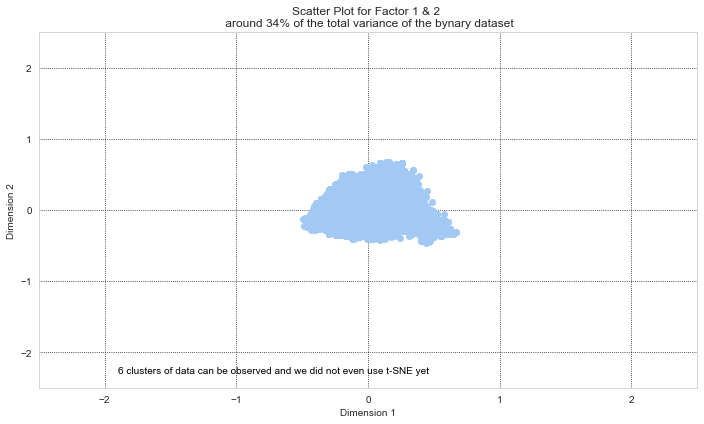

In [77]:
plt.figure(figsize = (10, 6))
plt.scatter(FACTOR_DF_PCA_BI[0],FACTOR_DF_PCA_BI[1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Scatter Plot for Factor 1 & 2 \n around 34% of the total variance of the bynary dataset')
plt.tight_layout()
plt.grid(color='black', linestyle='dotted')

plt.annotate('6 clusters of data can be observed and we did not even use t-SNE yet', 
xy=(-1.9, -2.3), xytext=(-1.9, -2.3), color='black')

plt.ylim([-2.5,2.5])
plt.xlim([-2.5,2.5])
plt.show();

In [214]:
#To be continued